In [42]:
# Data
# https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings

In [43]:
import pandas as pd
import numpy as np


# Product Ratings

In [44]:
rating=pd.read_csv('ratings_beauty.csv')
rating

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [45]:
cou=rating.groupby('ProductId').count()['Rating'].reset_index()


In [46]:
top_34=cou[cou['Rating']>=1000].reset_index()
top_34=top_34.sort_values('Rating',ascending=True)
top_34

,index,ProductId,Rating
3,5951,B0002JKPA4,1046
2,4545,B00021DVCQ,1051
27,132319,B004Z40048,1061
8,36929,B000VPPUEA,1074
16,79950,B002LB75AO,1079
7,35308,B000UVZU1S,1105
20,104577,B003UH0528,1108
33,162449,B007BLN17K,1135
13,53239,B001AO0WCG,1136
32,155167,B006L1DNWY,1153


<Figure size 1440x720 with 0 Axes>

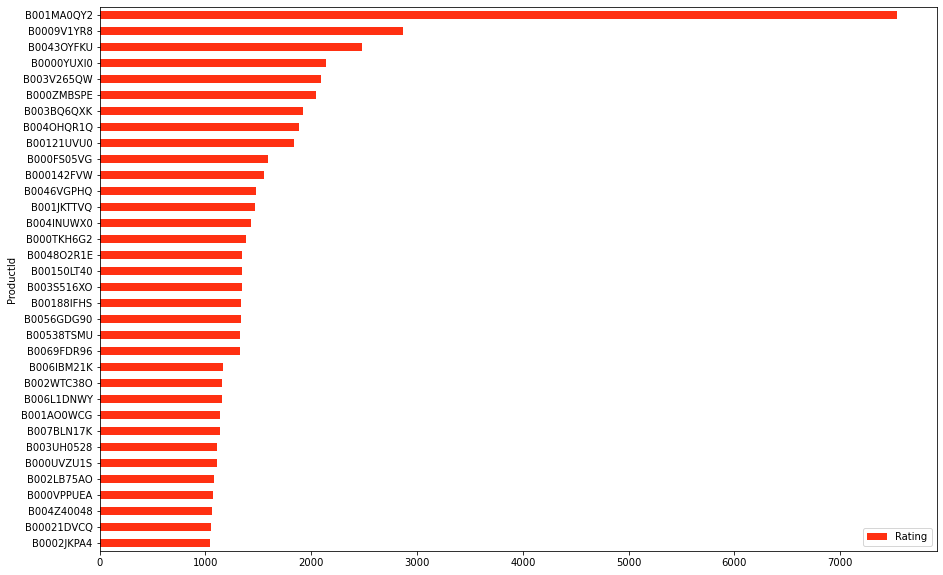

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(20,10))
# sb.countplot(y='ProductId',data=top_34,order=top_34['Rating'],palette='coolwarm_r')
# plt.title(title,fontsize=16)
top_34.plot(x='ProductId',y='Rating',kind='barh',figsize=(15,10),color='#ff3012')
plt.show()

In [48]:
rating['ProductId'].value_counts().head(10)

B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589
Name: ProductId, dtype: int64

# Data

In [49]:
data=pd.read_csv('data.csv',encoding='unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [50]:
data.groupby(['Description','Country'])['Quantity'].sum().nsmallest(10)

Description                   Country       
printing smudges/thrown away  United Kingdom   -19200
Unsaleable, destroyed.        United Kingdom   -15644
check                         United Kingdom   -12030
Printing smudges/thrown away  United Kingdom    -9058
Damaged                       United Kingdom    -7540
throw away                    United Kingdom    -5368
damages                       United Kingdom    -4338
incorrect stock entry.        United Kingdom    -4320
thrown away                   United Kingdom    -4110
wrongly marked. 23343 in box  United Kingdom    -3100
Name: Quantity, dtype: int64

In [51]:
con_qua=data.groupby(by=['Country'])['Quantity'].sum().nlargest(10)
con=con_qua.index
qua=con_qua.values

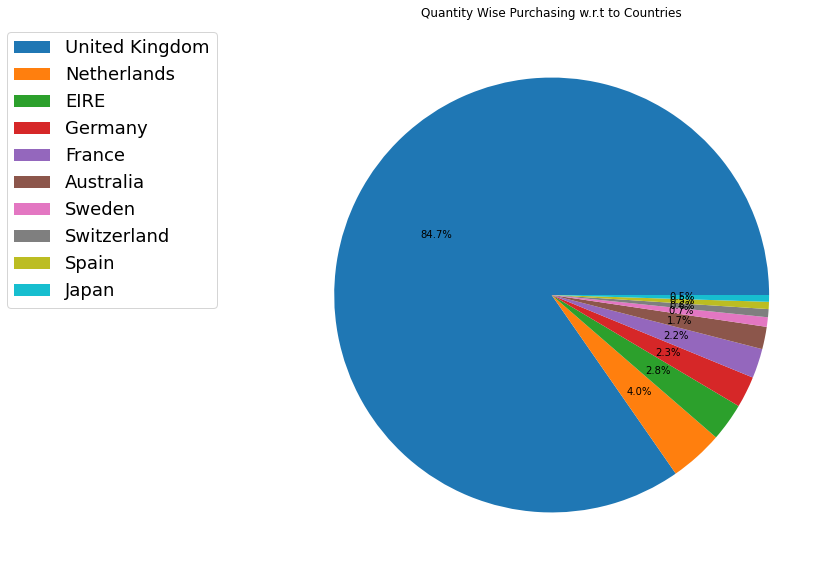

In [52]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,10))
w,t,a=ax.pie(x=qua,autopct="%1.1f%%",pctdistance=0.6)
plt.title("Quantity Wise Purchasing w.r.t to Countries")
plt.legend(w, con, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=18)
plt.show()

In [53]:
top=data.groupby(by=['Description'])['Quantity'].sum().nlargest(30)
# top_20=top.head(20)

In [54]:
top

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53847
JUMBO BAG RED RETROSPOT                47363
ASSORTED COLOUR BIRD ORNAMENT          36381
POPCORN HOLDER                         36334
PACK OF 72 RETROSPOT CAKE CASES        36039
WHITE HANGING HEART T-LIGHT HOLDER     35317
RABBIT NIGHT LIGHT                     30680
MINI PAINT SET VINTAGE                 26437
PACK OF 12 LONDON TISSUES              26315
PACK OF 60 PINK PAISLEY CAKE CASES     24753
VICTORIAN GLASS HANGING T-LIGHT        23854
ASSORTED COLOURS SILK FAN              23082
BROCADE RING PURSE                     23053
RED  HARMONICA IN BOX                  21866
JUMBO BAG PINK POLKADOT                21009
SMALL POPCORN HOLDER                   20116
PAPER CHAIN KIT 50'S CHRISTMAS         18902
LUNCH BAG RED RETROSPOT                18779
60 TEATIME FAIRY CAKE CASES            18040
PARTY BUNTING                          18022
CHARLOTTE BAG SUKI DESIGN              18002
HEART OF WICKER SMALL                  1783

<AxesSubplot:title={'center':'Product wise Sales'}, xlabel='Description', ylabel='sale'>

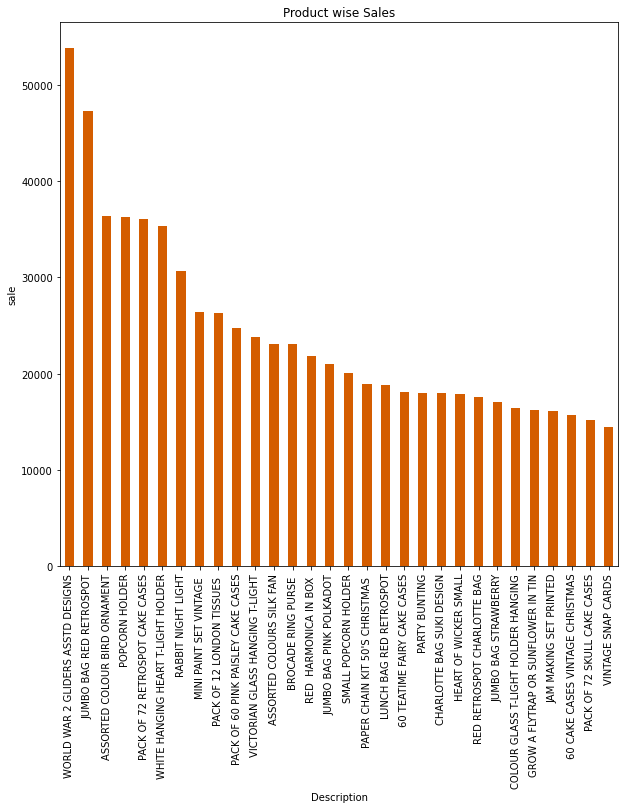

In [55]:
fig=plt.figure(figsize=(10,10))
plt.title("Product wise Sales")
plt.ylabel("sale")
top.plot(kind='bar',color='#d45d00')
# import seaborn as sb
# sb.barplot(data=top,x=top.index,y=top.values)

In [56]:
years=[]
months=[]
for r in data['InvoiceDate']:
    date=r.split()[0]
    year=date.split('/')[2]
    month=date.split('/')[0]
    years.append(int(year))
    months.append(int(month))

In [57]:
years
data['Year']=pd.Series(years)
data['Month']=pd.Series(months)

In [58]:
type(data['Year'])

pandas.core.series.Series

In [59]:
data.groupby(by=['Quantity','CustomerID']).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...
541881,581585,16016,LARGE CHINESE STYLE SCISSOR,10,12/9/2011 12:31,0.85,15804.0,United Kingdom,2011,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,2011,12
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011,12


In [60]:
year=data['Country'].value_counts().index
value=data['Country'].value_counts().values


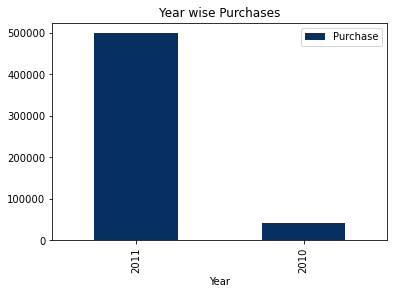

In [77]:
year=data['Year'].value_counts().reset_index()
year=year.rename(columns={'index':'Year','Year':'Purchase'})
year.plot(x='Year',y='Purchase',kind='bar',cmap='RdBu_r')
plt.title('Year wise Purchases')
plt.show()

In [62]:
data_qua_cus=data[['Month','CustomerID','Year']]
data_qua_cus.head(10)

,Month,CustomerID,Year
0,12,17850.0,2010
1,12,17850.0,2010
2,12,17850.0,2010
3,12,17850.0,2010
4,12,17850.0,2010
5,12,17850.0,2010
6,12,17850.0,2010
7,12,17850.0,2010
8,12,17850.0,2010
9,12,13047.0,2010


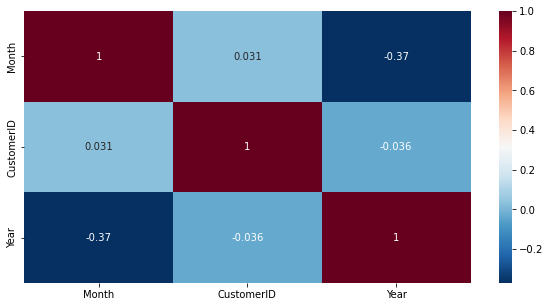

In [63]:
import seaborn as sb
corr=data_qua_cus.corr('pearson')
fig=plt.figure(figsize=(10,5))
sb.heatmap(corr,cmap='RdBu_r',annot=True)
plt.show()

In [64]:
year_qua=data['Year'].value_counts()
year=year_qua.index
qua=year_qua.values

In [65]:
data.groupby(by=['Year'])['Quantity'].sum().nlargest(10)#pie function

Year
2011    4834222
2010     342228
Name: Quantity, dtype: int64

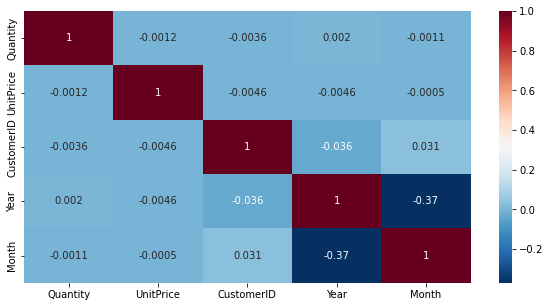

In [66]:
corr_1=data.corr('pearson')
fig=plt.figure(figsize=(10,5))
sb.heatmap(corr_1,cmap='RdBu_r',annot=True)
plt.show()

In [67]:
# data.groupby(by=['Month'])
data['Month'].value_counts()

11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: Month, dtype: int64

In [68]:
data.groupby(by=['CustomerID','Description'])['Quantity'].sum().head(30)

CustomerID  Description                        
12346.0     MEDIUM CERAMIC TOP STORAGE JAR           0
12347.0     3D DOG PICTURE PLAYING CARDS           126
            3D SHEET OF CAT STICKERS                12
            3D SHEET OF DOG STICKERS                12
            60 TEATIME FAIRY CAKE CASES             72
            72 SWEETHEART FAIRY CAKE CASES          72
            AIRLINE BAG VINTAGE JET SET BROWN       28
            AIRLINE BAG VINTAGE JET SET RED         16
            AIRLINE BAG VINTAGE JET SET WHITE       12
            AIRLINE BAG VINTAGE TOKYO 78            32
            AIRLINE BAG VINTAGE WORLD CHAMPION       8
            ALARM CLOCK BAKELIKE CHOCOLATE          20
            ALARM CLOCK BAKELIKE GREEN              16
            ALARM CLOCK BAKELIKE ORANGE              8
            ALARM CLOCK BAKELIKE PINK               16
            ALARM CLOCK BAKELIKE RED                36
            BATHROOM METAL SIGN                     12
            BICYC